In [1]:
#from logspace import *
import logspace, pyEmceeFit
import numpy as np
import sys,math

def trackPercent(place,totalLength,strLen): #percent output tracker
    percent = place/totalLength*100
    if math.floor(percent)==69:
        string="{:.2f} % complete -- nice".format(percent)
    else:
        string="{:.2f} % complete".format(percent)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

In [2]:
summitResults = logspace.readPickle('pyEmceeLogVar.p')
flat_samples,pos,prob = summitResults
maxInd = np.argmax(prob)
θBest = pos[maxInd] #prob matches with pos, NOT with flat_samples (idk why we have that one seems redundant to save both?)
iSummit,rBar,Mfac,rFac,f1,f2,f3,pa,scale,cenShift = θBest
M = Mfac
α,β,r,ν,φ,sini,cosi,dA,rMin,rLim=logspace.setup(iSummit,rBar,rFac,512,2048)
print("rMin = {:.2f}".format(rMin))
I,γ,A0,τ=logspace.getIntensity(r,φ,1,sini,cosi,rMin,f1=f1,f2=f2,f3=f3)
I1,γ,A0,τ=logspace.getIntensity(r,φ,1,sini,cosi,rMin,f1=f1,f2=0,f3=0)
I2,γ,A0,τ=logspace.getIntensity(r,φ,1,sini,cosi,rMin,f1=0,f2=f2,f3=0)
I3,γ,A0,τ=logspace.getIntensity(r,φ,1,sini,cosi,rMin,f1=0,f2=0,f3=f3)

rMin = 1796.49


In [3]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

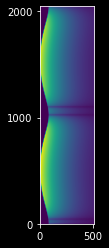

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure',facecolor='#2C313B') #for notebook coloring
matplotlib.rc('axes',facecolor='#2C313B')
plt.style.use('dark_background')
plt.imshow(I**0.25,origin='lower')
matplotlib.rc('font',**{'family':'serif','serif':['Asana Math'],'size':22})

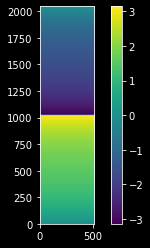

In [6]:
plt.imshow(φ,origin='lower')
plt.colorbar()

In [7]:
localResults = logspace.readPickle('pyEmceeVar.p')
flat_samples,pos,prob = localResults
maxInd = np.argmax(prob)
θBest = pos[maxInd] #prob matches with pos, NOT with flat_samples (idk why we have that one seems redundant to save both?)
iLocal,rBar0,Mfac,rFac,f1,f2,f3,pa,scale,cenShift = θBest
M0 = Mfac
#α0,β0,r0,ν0,φ0,sini,cosi=pyEmceeFit.setup()
#I0,γ,A0,τ = pyEmceeFit.getIntensity(r0,φ0,1,sini,cosi)
#np.min(r.flatten())
#np.min(np.abs(1e3*np.cos(np.linspace(0,2*np.pi,256))))

α0,β0,r0,ν0,φ0,sini,cosi,dA0,rMin,rLim=logspace.setup(iLocal+2,rBar0,rFac,512,2048)
print("rMin = {:.2f}".format(rMin))
I0,γ,A0,τ=logspace.getIntensity(r,φ,1,sini,cosi,rMin,f1=f1,f2=f2,f3=f3)
print(len(I0[r0<rMin]))
I0[r0<rMin]=0.

rMin = 1271.12
45228


In [6]:
np.min(r)

866.0254037844386

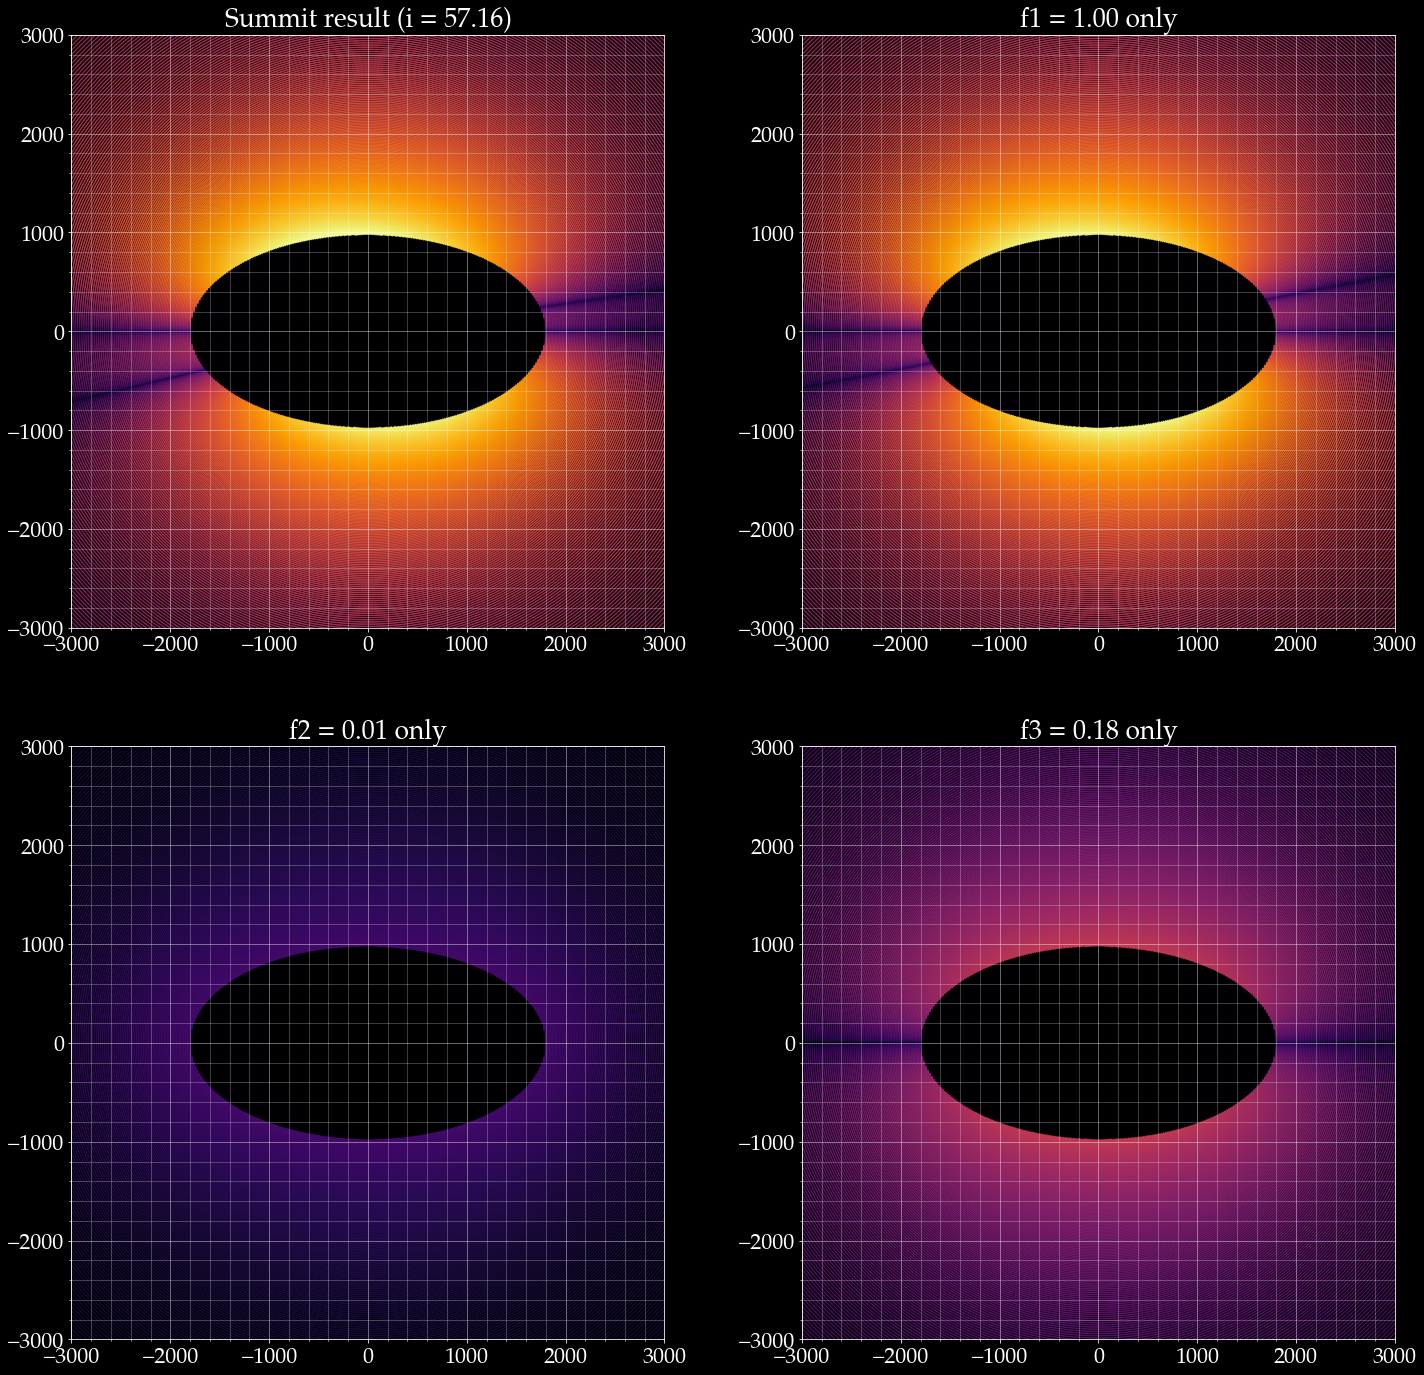

In [5]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(24,24))
IList = [I,I1,I2,I3]; fList=[f1,f2,f3]
for i in range(len(IList)):
    ax = axs.flatten()[i]; Iloop = IList[i];
    ax.scatter(α,β,marker='.',s=1,c=Iloop**0.25,cmap='inferno',vmin=0.0,vmax=np.max(IList[0]**0.25));
    #ax.plot(1e3*np.cos(φ),1e3*np.sin(φ),c='k');
    ax.set_xlim(-3e3,3e3); ax.set_ylim(-3e3,3e3)
    ax.set_aspect(1)
    title = "f{0} = {1:.2f} only".format(i,fList[i-1]) if i>0 else "Summit result (i = {:.2f})".format(iSummit)
    ax.set_title(title)
    ax.minorticks_on()
    ax.grid(b=True,which="major",alpha=0.5)
    ax.grid(b=True,which="minor",alpha=0.3)
fig.savefig('fcomparison.png',dpi=150)
# fig,ax1=plt.subplots(figsize=(12,12))
# ax1.scatter(r*np.cos(φ),r*np.sin(φ),marker='.',s=1,c=I**0.25,cmap='inferno');
# ax1.plot(1e3*np.cos(φ),1e3*np.sin(φ),c='k');
# ax1.set_xlim(-3e3,3e3); ax1.set_ylim(-3e3,3e3)
# # ax1.hlines([1523.99,-1523.99],xmin=-3e3,xmax=3e3)
# # ax1.vlines([1523.99,-1523.99],ymin=-3e3,ymax=3e3)
# ax1.set_aspect(1)
# ax1.set_title("Summit result (i = {:.2f})".format(iSummit))


# ax2.scatter(r0*np.cos(φ0),r0*np.sin(φ0),marker='.',s=1,c=I0**0.25,cmap='inferno')
# ax2.set_xlim(-3e3,3e3); ax2.set_ylim(-3e3,3e3)
# ax2.hlines([1421.29,-1421.29],xmin=-3e3,xmax=3e3)
# ax2.vlines([1421.29,-1421.29],ymin=-3e3,ymax=3e3)
# ax2.set_aspect(1)
# ax2.set_title("Local result (i = {:.2f})".format(iLocal));

In [66]:
channels = [-2000+i*100 for i in range(41)]
vel = (ν-1)*3e5
#mask = np.where((vel<channels[0]))
def makeIFrame(IList,fList,mask,vmin,vmax):
    fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(24,24))
    for i in range(len(IList)):
        ax = axs.flatten()[i]; Iloop = IList[i];
        if vmin!="False" and vmax!="False":
            label = "Emission between {0} and {1} km/s".format(vmin,vmax)
        else:
            if vmin!="False":
                label = "Emission < {} km/s".format(vmin)
            else:
                label = "Emission < {} km/s".format(vmax)
    
        ax.scatter(α[mask],β[mask],marker='.',s=1,c=Iloop[mask]**0.25,cmap='inferno',vmin=0.0,vmax=np.max(IList[0]**0.25),label=label);
        xCen = np.sum(Iloop[mask]*α[mask])/np.sum(Iloop[mask]); yCen = np.sum(Iloop[mask]*β[mask])/np.sum(Iloop[mask])
        if type(vmax)!=str:
            color = "crimson" if vmax > 0 else "dodgerblue"
        else:
            color = "dodgerblue"
        ax.scatter([xCen],[yCen],marker='x',s=300,label='centroid',color=color,linewidth=4)
        #ax.plot(1e3*np.cos(φ),1e3*np.sin(φ),c='k');
        ax.set_xlim(-3e3,3e3); ax.set_ylim(-3e3,3e3)
        ax.set_aspect(1)
        if i==0:
            l=ax.legend(bbox_to_anchor=(0.8, 1.2),loc='upper left',fontsize=24)
            l.get_frame().set_edgecolor('black')
        title = "f{0} = {1:.2f} only".format(i,fList[i-1]) if i>0 else "Summit result (i = {:.2f})".format(iSummit)
        ax.set_title(title)
        ax.minorticks_on()
        ax.grid(b=True,which="major",alpha=0.5)
        ax.grid(b=True,which="minor",alpha=0.3)
        ax.set_xlabel("α [code units]"); ax.set_ylabel("β [code units]")
    return fig,axs

def makeIFrames(IList,fList,channels,vel):
    strLen=0
    for i in range(len(channels)):
        if i==0:
            vmin = channels[i]
            vmax = "False"
            mask = np.where((vel<channels[i]))
        elif i==(len(channels)-1):
            vmin = "False"
            vmax = channels[i]
            mask = np.where((vel>channels[i]))
        else:
            vmin = channels[i-1]
            vmax = channels[i]
            mask = np.where((vel>channels[i-1]) & (vel<channels[i]))
        fig,axs = makeIFrame(IList,fList,mask,vmin,vmax)
        fig.savefig("tmpPlots/frame_{:03d}.png".format(i+1))
        plt.close()
        strLen = trackPercent(i+1,len(channels)+10,strLen)
    
    fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(24,24))
    IList = [I,I1,I2,I3]; fList=[f1,f2,f3]
    for i in range(len(IList)):
        ax = axs.flatten()[i]; Iloop = IList[i];
        ax.scatter(α,β,marker='.',s=1,c=Iloop**0.25,cmap='inferno',vmin=0.0,vmax=np.max(IList[0]**0.25));
        #ax.plot(1e3*np.cos(φ),1e3*np.sin(φ),c='k');
        ax.set_xlim(-3e3,3e3); ax.set_ylim(-3e3,3e3)
        ax.set_aspect(1)
        title = "f{0} = {1:.2f} only".format(i,fList[i-1]) if i>0 else "Summit result (i = {:.2f})".format(iSummit)
        ax.set_title(title)
        ax.minorticks_on()
        ax.grid(b=True,which="major",alpha=0.5)
        ax.grid(b=True,which="minor",alpha=0.3)
        ax.set_xlabel("α [code units]"); ax.set_ylabel("β [code units]")
        xCen = np.sum(Iloop*α)/np.sum(Iloop); yCen = np.sum(Iloop*β)/np.sum(Iloop)
        ax.scatter([xCen],[yCen],marker='x',s=300,label='centroid',color='white')
    fig.suptitle("All emission")
    fig.savefig("tmpPlots/frame_{:03d}.png".format(1+len(channels)))
    plt.close()
    import shutil
    for i in range(10):
        shutil.copy("tmpPlots/frame_{:03d}.png".format(1+len(channels)),"tmpPlots/frame_{:03d}.png".format(i+2+len(channels)))
        strLen = trackPercent(i+1+len(channels),len(channels)+10,strLen)

makeIFrames(IList,fList,channels,vel)

100.00 % complete

![gif](channelMap.gif)

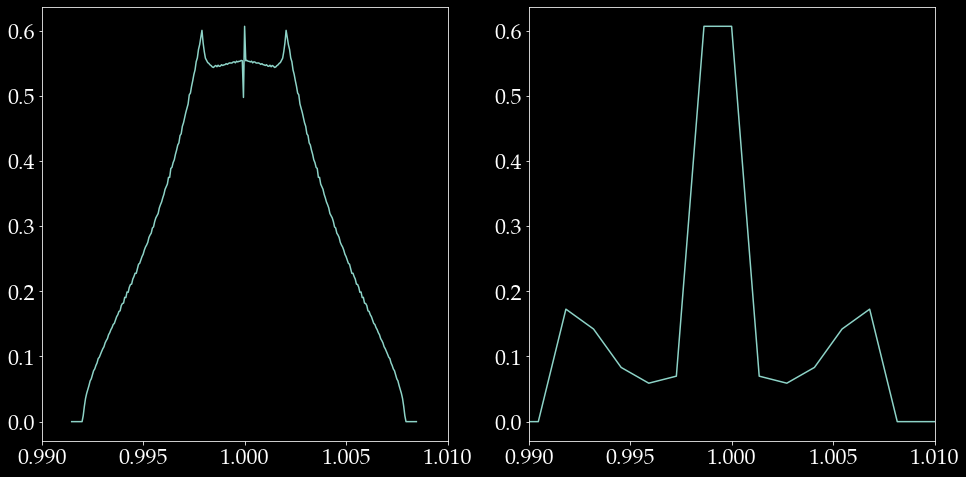

In [6]:
data = logspace.readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
λCen = 2.172
vel = (data[0]-λCen)/λCen*3e5
θ0 = [30.,2e3,1.1,15.,0.57,0.6,0.46,342.]
#     i, rMin,Mfac,rFac,f1, f2, f3,  pa
θP = [30., 4.5e3, 1.1, 15., 0.57, 0.6, 0.46, 342., 1., 0.]
#      i, rBar, Mfac, rFac, f1,   f2,  f3,   pa, scale,cenShift=params
x,line,phaseList = logspace.getProfiles(θP,data,300,512,2048)
x0,line0,phaseList0 = pyEmceeFit.getProfiles(vel,θ0,data,300,2048,2048)
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
#ax1.plot(vel,line)
ax1.plot(x[:-1],line)
ax1.set_xlim(0.99,1.01)
#ax2.plot(vel,line-np.min(line))
#ax2.plot(vel,line0)
ax2.plot(x0[:-1],line0)
ax2.set_xlim(0.99,1.01)
plt.show()

In [9]:
def get_rMinMax(rBar,rFac,γ=1):
    rMin = rBar*(rFac**(γ-5/2)-1)/(rFac**(γ-3/2)-1)*(γ-3/2)/(γ-5/2)
    rMax = rMin*rFac
    return rMin,rMax
    
get_rMinMax(4.5e3,15)

98

In [9]:
import time
t0=time.time()
line,phaseList = logspace.getProfiles(vel,θ0,data)
tf=time.time()
print("log takes {:.2f} s".format(tf-t0))

log takes 5.25 s


In [10]:
t0=time.time()
line,phaseList = pyEmceeFit.getProfiles(vel,θ0,data)
tf=time.time()
print("old version takes {:.2f} s".format(tf-t0))

old version takes 43.84 s


In [11]:
np.max(r)

17320.508075688766

In [12]:
α0,β0,r0,ν0,φ0,sini,cosi=pyEmceeFit.setup()
I0,γ,A0,τ = pyEmceeFit.getIntensity(r0,φ0,1,sini,cosi)

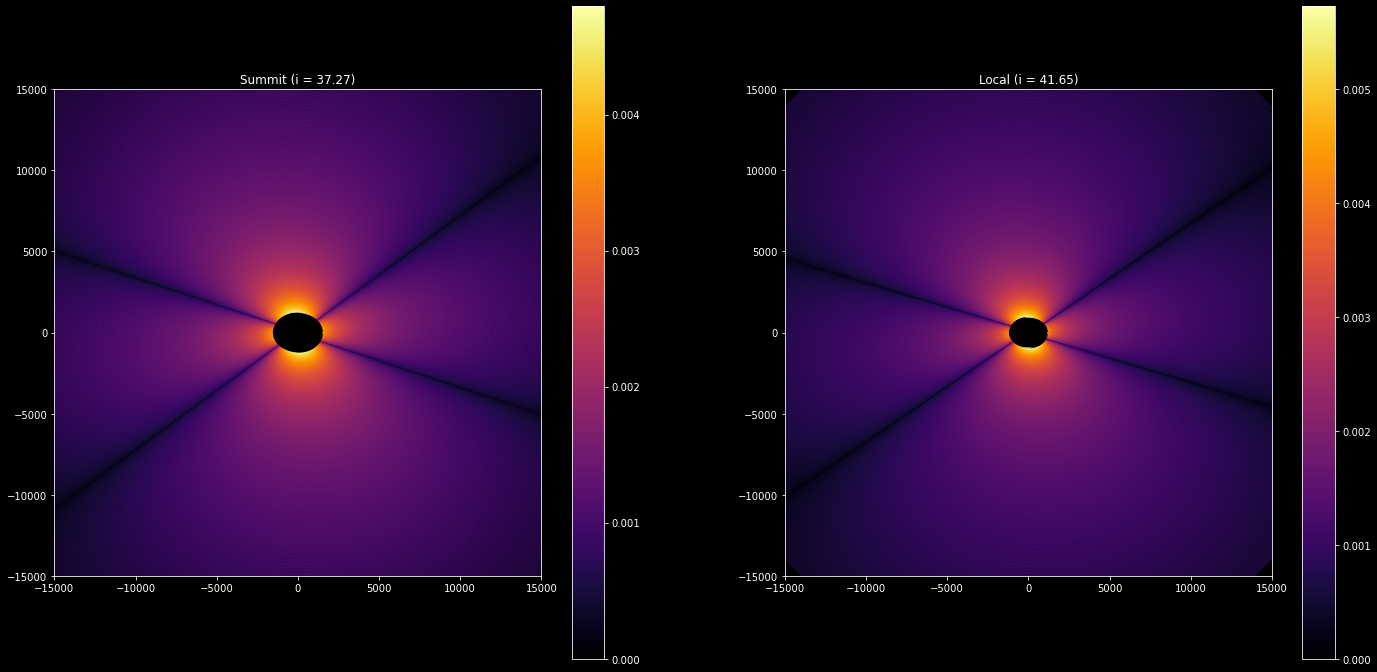

In [7]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(24,12))
s1=ax1.scatter(α0,β0,marker='.',s=1,c=I0**0.25,cmap='inferno',vmin=0.0,vmax=np.max(I0**0.25));
ax1.set_aspect(1); ax1.set_ylim(-15e3,15e3); ax1.set_xlim(-15e3,15e3)
plt.colorbar(s1,ax=ax1);
ax1.set_title("Summit (i = {:.2f})".format(iSummit))
s2=ax2.scatter(α,β,marker='.',s=1,c=I**0.25,cmap='inferno',vmin=0.0,vmax=np.max(I**0.25));
ax2.set_aspect(1); ax2.set_ylim(-15e3,15e3); ax2.set_xlim(-15e3,15e3);
plt.colorbar(s2,ax=ax2);
ax2.set_title("Local (i = {:.2f})".format(iLocal))
plt.show()

In [11]:
from scipy.stats import binned_statistic
def centroid(ν,I,α,β,dA,bins=40):
    xcen,edges,n = binned_statistic(ν.flatten(),(I*dA*α).flatten(),statistic='sum',bins=bins)
    ycen,edges,n = binned_statistic(ν.flatten(),(I*dA*β).flatten(),statistic='sum',bins=bins)
    iSum,edges,n = binned_statistic(ν.flatten(),(I*dA).flatten(),statistic='sum',bins=bins)
    νBin = 0.5*(edges[1:]+edges[:-1])
    iSum[iSum==0.]=1.
    return xcen/iSum, ycen/iSum, νBin, iSum

data = logspace.readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
λCen = 2.172
vel = (data[0]-λCen)/λCen*3e5

In [10]:
xC,yC,νBin,iSum = centroid(ν,I,α,β,dA)
xC0,yC0,νBin0,iSum0 = centroid(ν0,I0,α0,β0,dA0)
blRange = M*3e8*2e33*6.67e-8/9e20/548/3.09e24
blRange0 = M0*3e8*2e33*6.67e-8/9e20/548/3.09e24

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(24,4))
s1=ax1.scatter(xC*2*blRange/4.85e-12,yC*2*blRange/4.85e-12,c=(νBin-1)*3e5,cmap="RdBu",vmin=-2e3,vmax=2e3)
plt.colorbar(s1,ax=ax1);
ax1.set_title("Summit: rBar = {:.2f}".format(rBar*2*M*3e8*2e33*6.67e-8/9e20/548/3.09e24/4.85e-12))
ax1.set_aspect(1)
s2=ax2.scatter(xC0*2*blRange0/4.85e-12,yC0*2*blRange0/4.85e-12,c=(νBin0-1)*3e5,cmap="RdBu",vmin=-2e3,vmax=2e3)
ax2.set_title("Local: rBar = {:.2f}".format(rBar0*2*M0*3e8*2e33*6.67e-8/9e20/548/3.09e24/4.85e-12))
plt.colorbar(s2,ax=ax2);
ax2.set_aspect(1)
plt.show()

NameError: name 'I0' is not defined

In [ ]:
channels = [-2000+i*100 for i in range(41)]
vel = (ν-1)*3e5
BLRAng = M*3e8*2e33*6.67e-8/9e20/548/3.09e24
for i in range(len(IList)):


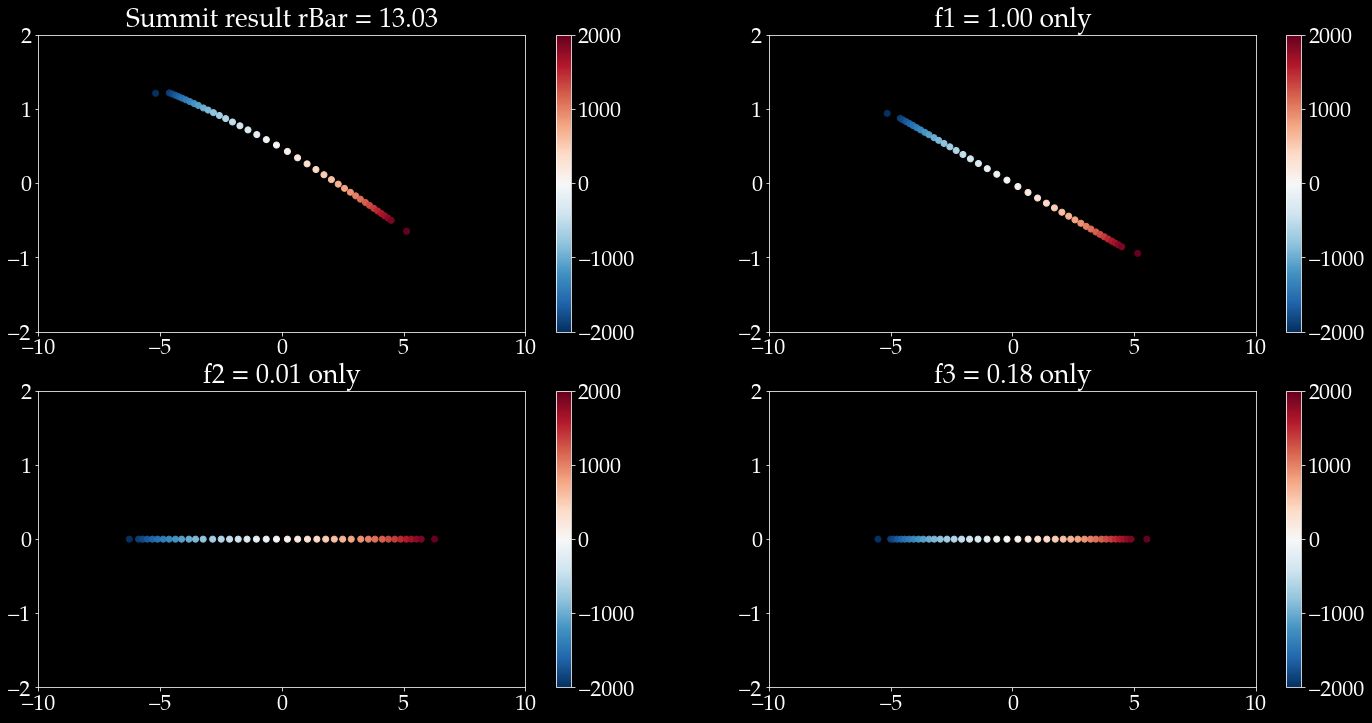

In [75]:
blRange = M*3e8*2e33*6.67e-8/9e20/548/3.09e24
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(24,12))
IList = [I,I1,I2,I3]; fList=[f1,f2,f3]
for i in range(len(IList)):
    ax = axs.flatten()[i]; Iloop = IList[i];
    #xC,yC,νBin,iSum = centroid(ν,Iloop,α,β,dA)
    xC,yC = np.zeros(len(channels)), np.zeros(len(channels))
    for j in range(len(channels)):
        if j==0:
            mask = np.where((vel<channels[j]))
        elif j==(len(channels)-1):
            mask = np.where((vel>channels[j]))
        else:
            mask = np.where((vel>channels[j-1]) & (vel<channels[j]))
        
        xCen = np.sum(Iloop[mask]*α[mask])/np.sum(Iloop[mask]); yCen = np.sum(Iloop[mask]*β[mask])/np.sum(Iloop[mask])
        xC[j],yC[j] = xCen,yCen
        
    #s=ax.scatter(xC*2*blRange/4.85e-12,yC*2*blRange/4.85e-12,c=(νBin-1)*3e5,cmap="RdBu",vmin=-2e3,vmax=2e3)
    s=ax.scatter(xC*2*blRange/4.85e-12,yC*2*blRange/4.85e-12,c=channels,cmap="RdBu_r")
    ax.set_xlim(-10,10); ax.set_ylim(-2,2)
    plt.colorbar(s,ax=ax);
    title = "f{0} = {1:.2f} only".format(i,fList[i-1]) if i>0 else "Summit result rBar = {:.2f}".format(rBar*2*M*3e8*2e33*6.67e-8/9e20/548/3.09e24/4.85e-12)
    ax.set_title(title)

In [71]:
xC

array([-1798.96015045, -1581.67972711, -1581.67972711, -1581.67972711,
       -1581.67972711, -1581.67972711, -1581.67972711, -1581.67972711,
       -1581.67972711, -1581.67972711, -1581.67972711, -1581.67972711,
       -1581.67972711, -1581.67972711, -1581.67972711, -1581.67972711,
       -1581.67972711, -1581.67972711, -1581.67972711, -1581.67972711,
       -1581.67972711, -1581.67972711, -1581.67972711, -1581.67972711,
       -1581.67972711, -1581.67972711, -1581.67972711, -1581.67972711,
       -1581.67972711, -1581.67972711, -1581.67972711, -1581.67972711,
       -1581.67972711, -1581.67972711, -1581.67972711, -1581.67972711,
       -1581.67972711, -1581.67972711, -1581.67972711, -1581.67972711,
         375.28169913])

In [16]:
# how to do it to data
# loop through bins in ν, so there is always a νMin (i) and νMax (i-1 if i > 0 else 0)
# do manual "binned_stat" in each ν bin, ie sum(I*dA*α) at indices corresponding to where ν (high res) > νMin && < νMax
# plot again
def getDataCentroids(vel,ν,I,α,β,dA,rotθ): #match centroids to velocities we have
    xDataCentroids = np.zeros(len(vel))
    yDataCentroids = np.zeros(len(vel))
    xBig = (I*dA*α).flatten(); yBig = (I*dA*β).flatten()
    ν = ((ν-1)*3e5).flatten(); I = (I*dA).flatten()
    ISum = np.zeros(len(vel))
    rotθ = rotθ/180*np.pi; norm = 1/(np.cos(rotθ)**2*np.sin(rotθ)**2) #don't multiply by this even though that should be included in inverse calc...?
    for i in range(len(vel)):
        νMin = vel[i-1] if i>0 else vel[0]-(vel[1]-vel[0]) #each bin is up to that value, "extra" bin on the left side I guess
        νMax = vel[i]
        mask = (ν > νMin) & (ν < νMax)
        xDataCentroids[i] = (np.sum(xBig[mask])*np.cos(rotθ)+np.sum(yBig[mask])*(-np.sin(rotθ)))
        yDataCentroids[i] = (np.sum(xBig[mask])*np.sin(rotθ)+np.sum(yBig[mask])*np.cos(rotθ))
        ISum[i] = np.sum(I[mask]) if np.sum(I[mask]) > 0. else 1.
    return xDataCentroids/ISum,yDataCentroids/ISum


/home/kirk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


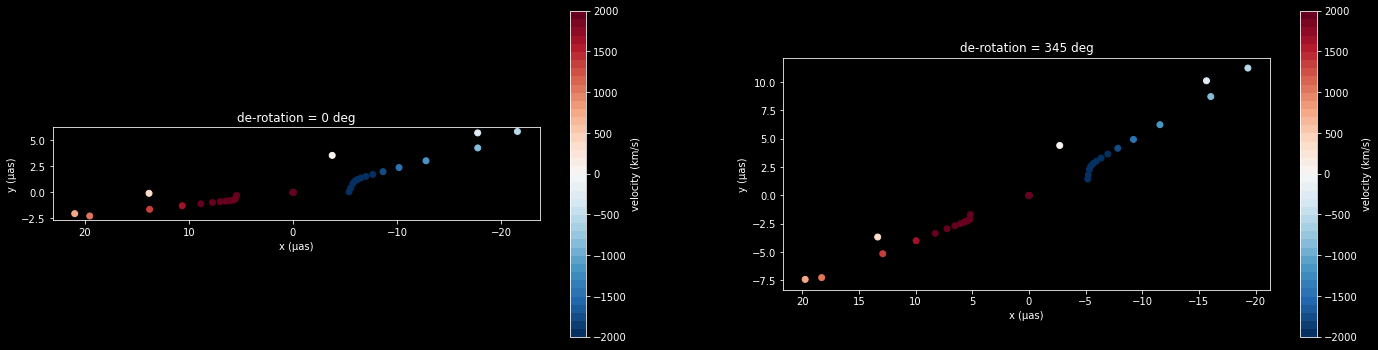

In [17]:
rotθ1 = 0; rotθ2 = 345
x,y = getDataCentroids(vel,ν,I,α,β,dA,rotθ1)
x2,y2 = getDataCentroids(vel,ν,I,α,β,dA,rotθ2)

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(24,6))

cmap = plt.get_cmap('RdBu_r',len(vel))
cax1 = ax1.scatter(x*2*blRange/4.85e-12,y*2*blRange/4.85e-12,c=vel,cmap=cmap,vmin=-2e3,vmax=2e3)
fig.colorbar(cax1,ax=ax1,label="velocity (km/s)");
ax1.set_title("de-rotation = {} deg".format(rotθ1))
ax1.set_xlabel("x (μas)"); ax1.set_ylabel("y (μas)")
ax1.invert_xaxis()
cax2 = ax2.scatter(x2*2*blRange/4.85e-12,y2*2*blRange/4.85e-12,c=vel,cmap=cmap,vmin=-2e3,vmax=2e3)
ax1.set_aspect(1); ax2.set_aspect(1)
ax2.set_title("de-rotation = {} deg".format(rotθ2))
ax2.set_xlabel("x (μas)"); ax2.set_ylabel("y (μas)")
ax2.invert_xaxis()
fig.colorbar(cax2,ax=ax2,label="velocity (km/s)")
plt.show()

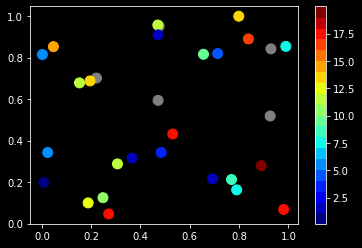

In [62]:
x, y, z = np.random.random((3, 30))
z = z * 20 + 0.1

# Set some values in z to 0...
z[:5] = 0

cmap = plt.get_cmap('jet', 20)
cmap.set_under('gray')

fig, ax = plt.subplots()
cax = ax.scatter(x, y, c=z, s=100, cmap=cmap, vmin=0.1, vmax=z.max())
fig.colorbar(cax)

plt.show()

In [ ]:
np.max(I)

In [ ]:
np.max(I0)

In [ ]:
np.min(I)

In [ ]:
2*np.pi*r/np.max(r)

In [ ]:
np.sum(I)*np.sum(r)**2

In [ ]:
np.sum(I0)*np.sum(r0)**2

In [ ]:
I[r==np.min(r)]

In [ ]:
I0[r0==1e3]

In [ ]:
mask = (r0 < 1.001e3) & (r0 > 0.999e3)
len(r0[mask])

In [ ]:
I0[mask]

In [ ]:
A0 = np.sum(α*β)
A0

In [ ]:
xmax = np.max(r0*np.cos(φ0)); ymax = np.max(r0*np.sin(φ0))
A0 = 4*xmax*ymax
A0
print(A0,4*1.5e4**2/np.cos(30/180*np.pi))

In [ ]:
xmax = np.max(r*np.cos(φ)); ymax = np.max(r*np.sin(φ))
A = np.pi*(np.max(r)-np.min(r))**2
A0/A

In [ ]:
np.mean(I0)

In [ ]:
np.mean(I)

In [ ]:
np.mean(r)

In [ ]:
np.mean(r0)

In [ ]:
Δr = np.abs(r[1][0]-r[0][0]); Δφ = np.abs(φ[1][0]-φ[0][0])
np.sum(I*r**2)*(np.max(r)-np.min(r))*(2*np.pi)/len(I.flatten())

In [ ]:
I[r==np.max(r)]

In [ ]:
I0[r0==np.max(r0)]

In [ ]:
i=np.argmax(I)
r.flatten()[i] #1e3
#np.max(I)

In [ ]:
i=np.argmax(I0)
r0.flatten()[i] #1e3
#np.max(I0)

In [ ]:
len(I.flatten())

In [ ]:
np.sum(I*r**2)

In [7]:
xmax = np.max(α0); xmin = np.min(α0); ymax = np.max(β0); ymin = np.min(β0)
int0 = 0; Δx = (xmax-xmin)/I0.shape[0]; Δy = (ymax-ymin)/I0.shape[1]
for i in range(I0.shape[0]):
    for j in range(I0.shape[1]):
        int0 += I0[i,j]*Δx*Δy
print(int0)

0.006034746662845862


In [ ]:
rMin = np.min(r)
rMin

In [8]:
intC = 0; Δlnr = np.log(r[0,1]/r[0,0]); Δφ = φ[1,0] - φ[0,0]
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        #Δφ = (φ[i,j]-φ[i-1,j]) if i>0 else (φ[1,j]-φ[0,j])
        intC += I[i,j]*r[i,j]*Δφ*(r[0,1]-r[0,0])
print(intC,Δlnr,Δφ)

0.00759299400468093 0.015827655033159096 0.007085124127778301


In [9]:
print(intC/int0)
#print(A/A0)

1.2582125528862267


In [ ]:
print(np.exp(Δlnr),r[0,1]-r[0,0])

In [ ]:
from scipy.integrate import simps
simps(I.flatten(),r.flatten())

In [ ]:
from scipy.integrate import simpson
simpson(I.flatten(),r.flatten())

In [ ]:
plt.scatter(r,I)

In [ ]:
plt.scatter(r0,I0)
plt.xlim(0,15e3)

In [ ]:
np.trapz(np.trapz(I*r[0,:],x=r[0,:],axis=-1)*r[:,0],x=φ[:,0],axis=-1)

In [ ]:
np.trapz(np.trapz(I0,x=α0[0,:],axis=-1),x=β0[:,0],axis=-1)

In [ ]:
np.trapz(np.trapz(I*r[0,:],x=α[0,:],axis=-1)*r[:,0],x=β[:,0],axis=-1)

In [ ]:
plt.plot(φ.flatten(),I.flatten())

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(12,12))
ax.scatter(φ, r,marker='.',s=1,c=I**0.25,cmap='inferno');

In [ ]:
φ[:,0]

In [ ]:
np.arctan2(β[100,0],α[0,0]*np.cos(75))

In [ ]:
β[100,0]

In [ ]:
α[0,0]

In [ ]:
np.arctan2(β[100,0],α[0,0])

In [ ]:
plt.plot(β[:,0],np.arctan2(β[:,0],α[0,0])*np.cos(75/180*np.pi))
plt.plot(β[:,0],np.arctan2(β[:,0],α[0,0]))

In [ ]:
β[:,0] #this is weird

In [ ]:
r[:,0]

In [ ]:
def ellipse(r,θ,cosi):
        A = r; B = r*cosi #ellipse is shrunk in y direction by factor of cosi projection
        e = np.sqrt(1-(B/A)**2)
        return B/np.sqrt(1-(e*np.cos(θ))**2)
rMin=1e3; rLim = 1.5e4; nρ=100; nΦ=100
i = 75/180*np.pi; cosi = np.cos(i); sini = np.sin(i)
rCam = np.logspace(np.log(rMin),np.log(rLim),num=nρ,base=np.e);
φCam = np.linspace(0,2*np.pi,nΦ,endpoint=False) #r and φ in camera coords

In [ ]:
α,β = np.zeros((nΦ,nρ)), np.zeros((nΦ,nρ)) #keep forgetting python is row major
for i in range(nρ):
    α[:,i] = ellipse(rCam[i],φCam,cosi) #ellipse runs "down" the array (φ direction) while r goes from min to max across
    β[:,i] = φCam

In [ ]:
α[0,:] #first row contains all of rMin values

In [ ]:
β[99,:]

In [ ]:
x,y = α*np.cos(β), α*np.sin(β)

In [ ]:
print(np.min(x),np.max(x))
print(np.min(y),np.max(y))

In [ ]:
β[99,:]

In [ ]:
α[99,:]

In [ ]:
α[99,:]*np.cos(β[99,:])

In [ ]:
x[99,:]

In [ ]:
r = np.sqrt(y**2/cosi**2+x**2); φ = np.arctan2(y,x*cosi)

In [ ]:
φ[:,0]

In [ ]:
φ0[:,0]

In [ ]:
r[0,:]

In [ ]:
l1=np.log(r[0,10])-np.log(r[0,9]); l2=np.log(r[0,-1])-np.log(r[0,-2])
l3=np.log(r[0,10]/r[0,9])
print(l1,l2,l3)

In [ ]:
c = (np.exp(l1/2)-1)**2+2*(np.exp(l1/2)-1)-(1-np.exp(-l1/2))**2+2*(1-np.exp(-l1/2))
print(c,l1*2)

In [ ]:
2*np.sinh(l1)

In [ ]:
r

In [ ]:
α,β,r,ν,φ,sini,cosi,dA=logspace.setup()
np.max(dA)

In [ ]:
np.argmax(dA)

In [ ]:
r.flatten()[np.argmax(dA)]

In [ ]:
problem=φ.flatten()[np.argmax(dA)]

In [ ]:
Δφ = np.abs(φ[1,0]-φ[0,0])
np.arctan(cosi*np.tan(problem+Δφ))-np.arctan(cosi*np.tan(problem-Δφ))

In [ ]:
Δlnr = np.log(r[0,1]/r[0,0]); Δφ = np.abs(φ[1,0]-φ[0,0])
rPart = r**2*np.sinh(Δlnr)/cosi
φpart = np.arctan(cosi*np.tan(φ+Δφ))-np.arctan(cosi*np.tan(φ-Δφ))

In [ ]:
np.max(rPart)

In [ ]:
np.min(φpart)

In [ ]:
np.max(φpart)

In [ ]:
np.max(rPart)*-1*np.min(φpart)

In [ ]:
plt.scatter(φ/np.pi,φpart);
plt.xlim(-1/2-Δφ/np.pi,-1/2+Δφ/np.pi)

In [ ]:
print(np.arctan(cosi*np.tan(-np.pi/2))-np.arctan(cosi*np.tan(-np.pi/2-2*Δφ)),np.arctan(cosi*np.tan(-np.pi/2+Δφ))-np.arctan(cosi*np.tan(-np.pi/2-Δφ)),np.arctan(cosi*np.tan(-np.pi/2+2*Δφ))-np.arctan(cosi*np.tan(-np.pi/2)))

In [ ]:
plt.scatter(φ[φpart<0]/np.pi,φpart[φpart<0])
plt.xlim(-1/2-Δφ/np.pi-0.001,-1/2+Δφ/np.pi+0.001)
plt.plot(np.array([1,1])*(-1/2-Δφ/np.pi),np.array([-3,0]),color='k')

In [ ]:
np.array([1,1])*(-1/2-Δφ/np.pi)

In [ ]:
φpart[φpart<0] = np.max(φpart)

In [ ]:
np.min(φpart)

In [ ]:
plt.scatter(φ,φpart)